In [1]:
import eda
import pandas as pd
import ajust_datasets
import preparation

c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## EDA

#### Getting data insights

In [2]:
#ajust_datasets.get_bank()
data = pd.read_csv('ban_data.csv')
target_column='Cible'
eda.summarize_data(data, target_column=target_column)

Shape of dataset: (1000, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Statut_compte_courant   1000 non-null   object
 1   Duree_mois              1000 non-null   int64 
 2   Historique_credit       1000 non-null   object
 3   Objectif                1000 non-null   object
 4   Montant_credit          1000 non-null   int64 
 5   Compte_epargne          1000 non-null   object
 6   Emploi_actuel_depuis    1000 non-null   object
 7   Taux_versement          1000 non-null   int64 
 8   Statut_personnel_sexe   1000 non-null   object
 9   Autres_debiteurs        1000 non-null   object
 10  Residence_depuis        1000 non-null   int64 
 11  Propriete               1000 non-null   object
 12  Age_annees              1000 non-null   int64 
 13  Autres_plans_versement  1000 non-null   object
 14  Logement             

Problème détecté
Les types des variables catégoriques sont object (comme Statut_compte_courant et Objectif).
La cible (Cible) est une variable numérique (int64) mais représente une classe binaire.
La fonction n'interprète pas correctement les types object comme catégoriels.


In [3]:
df = preparation.convert_to_categorical(data)
df.dtypes

Conversion de la colonne 'Taux_versement' en type catégoriel (valeurs distinctes : 4).
Conversion de la colonne 'Residence_depuis' en type catégoriel (valeurs distinctes : 4).
Conversion de la colonne 'Nb_credits_existant' en type catégoriel (valeurs distinctes : 4).
Conversion de la colonne 'Nb_personnes_a_charge' en type catégoriel (valeurs distinctes : 2).
Conversion de la colonne 'Cible' en type catégoriel (valeurs distinctes : 2).


Statut_compte_courant       object
Duree_mois                   int64
Historique_credit           object
Objectif                    object
Montant_credit               int64
Compte_epargne              object
Emploi_actuel_depuis        object
Taux_versement            category
Statut_personnel_sexe       object
Autres_debiteurs            object
Residence_depuis          category
Propriete                   object
Age_annees                   int64
Autres_plans_versement      object
Logement                    object
Nb_credits_existant       category
Travail                     object
Nb_personnes_a_charge     category
Telephone                   object
Travailleur_etranger        object
Cible                     category
dtype: object

In [4]:
eda.detect_missing_values(data)

Aucune valeur manquante détectée.



#### Synthèse avec Insights d'un Data Analyste


##### Structure des données
Dimensions du dataset : Le dataset contient 1000 clients décrits par 21 variables.
Types de variables :
8 variables numériques : Incluent des informations comme la durée des crédits, les montants empruntés, et l'âge des clients.
13 variables catégorielles : Reflètent des caractéristiques qualitatives telles que le statut du compte bancaire, l'objectif du crédit ou le type de logement.
##### Insights descriptifs
Âge des clients (Age_annees) :

Les clients ont en moyenne 35 ans, ce qui reflète une clientèle majoritairement en début ou milieu de carrière professionnelle.
L'âge varie entre 19 ans et 75 ans, indiquant que le dataset inclut des clients jeunes mais également des seniors.
Montant des crédits (Montant_credit) :

Le montant moyen emprunté est de 3271 unités monétaires, avec une forte dispersion (écart-type de 2823), ce qui indique une clientèle variée en termes de besoins financiers.
Les crédits vont de 250 unités (petits crédits) à 18 424 unités (crédits importants), suggérant que la banque sert à la fois des besoins modestes et des projets majeurs.
Durée des crédits (Duree_mois) :

La durée moyenne des crédits est de 21 mois, ce qui indique une majorité de prêts à court ou moyen terme.
Les crédits s'étendent de 4 mois à 72 mois, couvrant un éventail de durées adaptées à différents profils de clients.
Taux de versement (Taux_versement) :

En moyenne, les clients allouent 30% de leur revenu disponible pour rembourser leurs crédits.
Le taux varie entre 1 (faible taux) et 4 (taux élevé), reflétant des différences dans les capacités de remboursement des clients.
Âge de résidence (Residence_depuis) :

En moyenne, les clients vivent dans leur logement depuis 3 ans, ce qui peut refléter une relative stabilité résidentielle.
La durée de résidence va de 1 an à 4 ans, ce qui pourrait indiquer des changements fréquents ou une base de clients locataires.

##### Variable cible : Classification des clients (Cible)
Les clients sont classés en deux catégories :
1 (bons clients) : 700 clients (70%).
2 (mauvais clients) : 300 clients (30%).
Déséquilibre : Une nette prédominance des bons clients dans les données, ce qui pourrait influencer les modèles prédictifs. Ce déséquilibre nécessite des ajustements pour éviter un biais vers la classe majoritaire.


##### Insights complémentaires
Segmentation des clients par âge et montant emprunté :

Les clients plus jeunes (<30 ans) pourraient correspondre à des crédits plus faibles (étudiants ou jeunes actifs).
Les clients plus âgés (>50 ans) semblent davantage représentés dans les montants moyens ou élevés (projets plus importants comme l'immobilier).
Capacité de remboursement (Taux_versement) :

La majorité des clients (75e percentile) consacre environ 30 à 40% de leurs revenus au remboursement, ce qui reflète des engagements financiers modérés.
Montants élevés :

Quelques emprunts très élevés (jusqu'à 18 424) pourraient correspondre à des crédits spécifiques, comme des projets immobiliers ou professionnels.

#### Seeing our data

Statistiques descriptives pour Nb_credits_existant:

count     1000
unique       4
top          1
freq       633
Name: Nb_credits_existant, dtype: int64


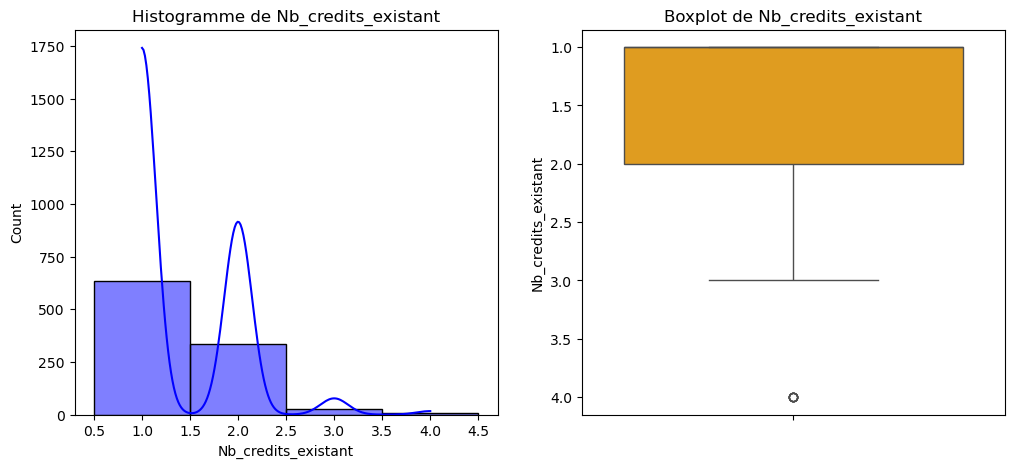

Test de Shapiro-Wilk pour Nb_credits_existant :
Statistique = 0.660, p-valeur = 0.000
La distribution de Nb_credits_existant n'est pas normale (p <= 0.05).


In [5]:
eda.univariate_analysis(data, 'Nb_credits_existant')

In [6]:
eda.detect_outliers(data, ['Nb_credits_existant'])

{}

In [7]:
eda.study_relationships(data, target_column)

,test,p-value
Statut_compte_courant,Chi2,0.0
Duree_mois,ANOVA,0.0
Historique_credit,Chi2,0.0
Objectif,Chi2,0.000116
Montant_credit,ANOVA,0.000001
Compte_epargne,Chi2,0.0
Emploi_actuel_depuis,Chi2,0.001045
Taux_versement,Chi2,0.140033
Statut_personnel_sexe,Chi2,0.022238
Autres_debiteurs,Chi2,0.036056


In [8]:
eda.variable_importance(data, target_column)

,Importance
Duree_mois,0.214927
Montant_credit,0.154739
Statut_compte_courant,0.065668
Historique_credit,0.030234
Compte_epargne,0.019488
Objectif,0.017255
Propriete,0.011773
Emploi_actuel_depuis,0.009082
Logement,0.008840
Autres_plans_versement,0.006152


In [9]:
df.dtypes

Statut_compte_courant       object
Duree_mois                   int64
Historique_credit           object
Objectif                    object
Montant_credit               int64
Compte_epargne              object
Emploi_actuel_depuis        object
Taux_versement            category
Statut_personnel_sexe       object
Autres_debiteurs            object
Residence_depuis          category
Propriete                   object
Age_annees                   int64
Autres_plans_versement      object
Logement                    object
Nb_credits_existant       category
Travail                     object
Nb_personnes_a_charge     category
Telephone                   object
Travailleur_etranger        object
Cible                     category
dtype: object

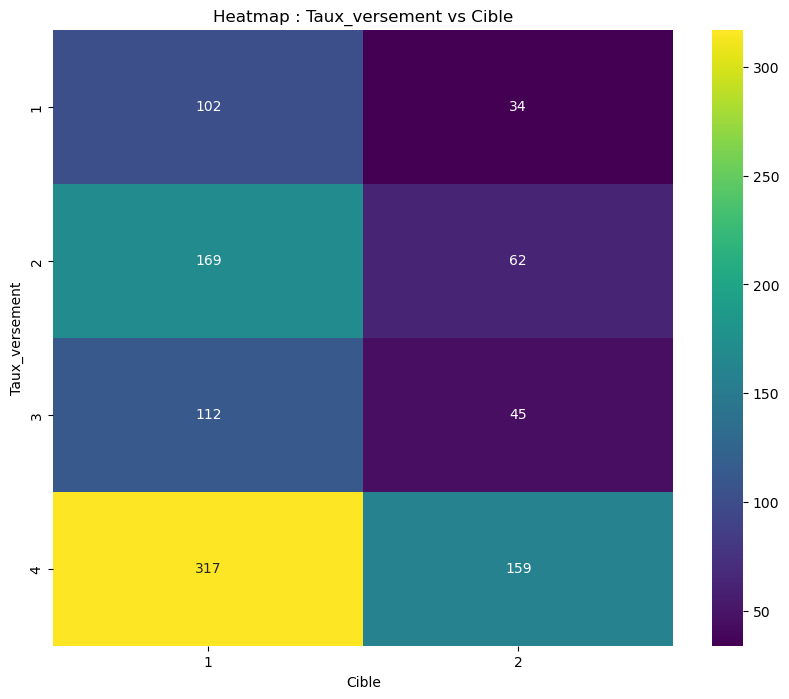

In [10]:
eda.bivariate_analysis(df, column1="Taux_versement", column2=target_column)

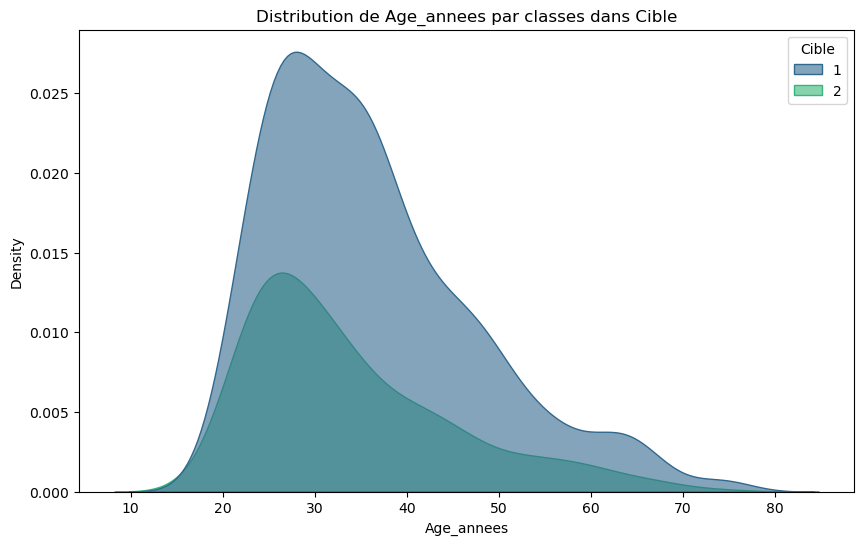

In [11]:
eda.compare_distributions(df, column="Age_annees", target_column=target_column)


Distribution des classes :
 Cible
1    700
2    300
Name: count, dtype: int64


c:\Users\Rania\Desktop\AMSD\M2\sup\Projet_Apprentissage_supervisé-20241114\eda.py:260: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


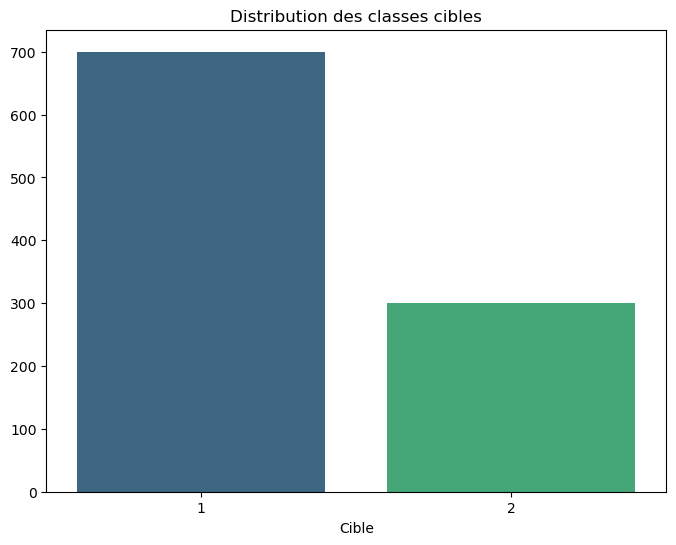

In [12]:
eda.analyze_class_imbalance(data, target_column)

## Data preparation

In [13]:
#### Cette partie est inclue dans le module Modelisation, car chaque modele requiert une preparation specifique
# du coup ici : on organize les donnes, pour pouvoir les modeliser.
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=target_column)  # Drop the target column to get features
y = data[target_column]                # Select the target column as the labels

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


In [14]:
from supervised import *


models = {
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model,
    "KNN": knn_model,
    "SVM": svm_model,
    "Decision Tree": decision_tree_model,
    "Naive Bayes": naive_bayes_model
}

## Modelisation

#### Logistic regression

In [15]:
import evaluation

final_results = {}

## Ici ce que je fais est de garder le modele qui donne la meilleure accuracy avec la technique la plus optimale entre oversampling, undersampling, et la methode combinée
models = {
    "Logistic Regression": logistic_regression_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func,model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")





Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Calcul des VIF terminé.
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...


c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_

Logistic Regression (Oversampling): Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


ValueError: X has 20 features, but LogisticRegression is expecting 54 features as input.

## Evaluation